## Classical simulation of triple dot

This classical simulation of a triple dot system investigates the behaviour of the dot system at a fixed total electron number n=3. It specifically investigates the behaviour of the honeycomb measurements around different charge distribution states.

### Import packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from qtt.simulation.classicaldotsystem import ClassicalDotSystem, TripleDot


<IPython.core.display.Javascript object>

/Users/laurens/Qcodes/qtt/qtt/pmatlab.py:174: UserWarning: pmatlab: could not load skimage.filters, not all functionality is available
  warnings.warn('pmatlab: could not load skimage.filters, not all functionality is available')


### Initialize dot system

In [70]:
DotSystem = TripleDot(maxelectrons=3)

DotSystem.alpha = np.array([[1.0, 0.5, 0.25],
                            [0.5, 1.0, 0.5],
                            [0.25, 0.5, 1.0]])
DotSystem.W = 2*np.array([5.0, 1.0, 5.0])

## 2. N=3 plane

Let's now look at 

In [73]:
def create_linear_gate_matrix(gate_points, steps_x, steps_y):
    x_y_start = gate_points[0]
    x_end = gate_points[1]
    y_end = gate_points[2]
    step_x = ((x_end-x_y_start) * 1.0 / (steps_x-1))
    step_y = ((y_end-x_y_start) * 1.0 / (steps_y-1))
    return [[start_x+i*step_x for i in range(steps_x)] for start_x in [x_y_start+i*step_y for i in range(steps_y)]]

def calculate_end_points(ref_point,ref_value,dirVecX,dirVecY,rangeX,rangeY):
    gate_points = []
    gate_points.append(ref_value-(rangeX*(1-ref_point[0])*dirVecX)-(rangeY*(1-ref_point[1])*dirVecY))
    gate_points.append(gate_points[0]+rangeX*dirVecX)
    gate_points.append(gate_points[0]+rangeY*dirVecY)
    return gate_points

def create_all_gate_matrix(ref_point, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY):
    gate_matrix=np.zeros((3,pointsX,pointsY))
    for gate in range(len(ref_value)):
        end_points = calculate_end_points(ref_point,ref_value[gate],dirVecX[gate],dirVecY[gate],rangeX,rangeY)
        gate_matrix[gate]= create_linear_gate_matrix(end_points,pointsX,pointsY)
    return gate_matrix

### Define gate plane

simulatehoneycomb: 0.60 [s]


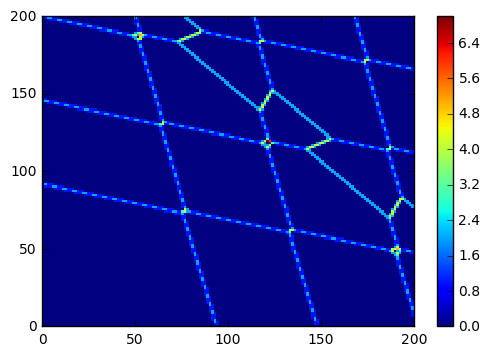

In [79]:
P1 = 100.0
P2 = -25.0
P3 = 100.0
ref_pt = [0.5, 0.5]
ref_value = [P1, P2, P3]
dirVecY = [0.0, 0.0, 1.0]
dirVecX = [1.0, 0.0, 0.0]
rangeX = 200
rangeY = 200
pointsX = 150
pointsY = 150

end_points_x = calculate_end_points(ref_pt,ref_value[0],dirVecX[0],dirVecY[0],rangeX,rangeY)
sweepx = np.linspace(end_points_x[0], end_points_x[1], pointsX)

end_points_y = calculate_end_points(ref_pt,ref_value[2],dirVecX[2],dirVecY[2],rangeX,rangeY)
sweepy = np.linspace(end_points_y[0], end_points_y[2], pointsY)

gate_matrix=create_all_gate_matrix(ref_pt, ref_value, dirVecX, dirVecY, rangeX, rangeY, pointsX, pointsY)

DotSystem.simulate_honeycomb(gate_matrix)

plt.pcolor(sweepx,sweepy,DotSystem.honeycomb)
plt.colorbar()
plt.show()